****Time Series Alucar****

In [22]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [23]:
alucar = pd.read_csv('./data/alucar.csv', sep=',')

**Verificação de valores iniciais**

In [24]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [25]:
print('Quantidade de linhas e colunas: {}'.format(alucar.shape))

Quantidade de linhas e colunas: (24, 2)


In [26]:
print('Quantidade de dados nulos: {}'.format(alucar.isna().sum().sum()))

Quantidade de dados nulos: 0


**Conversão do tipo para datetime**

In [27]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [28]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

**Plotagem tempo x vendas**

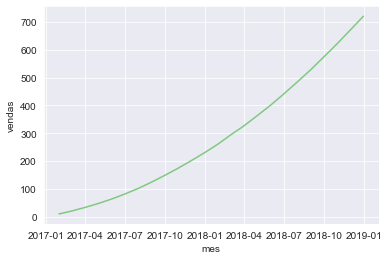

In [29]:
sns.lineplot(x='mes', y='vendas', data= alucar)

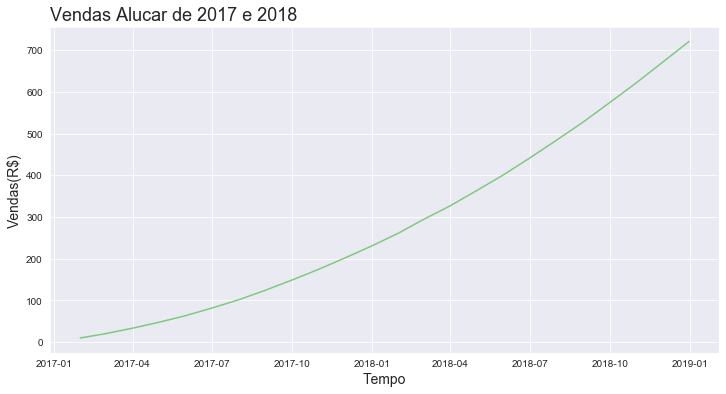

In [30]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data= alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas(R$)', fontsize=14)
ax=ax

***Decomposição e autocorrelação***

**Aumento das vendas mês a mês**

In [31]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [32]:
alucar['aumento'] = alucar['vendas'].diff()
aumento = alucar.head()


,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


In [36]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data= dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax=ax

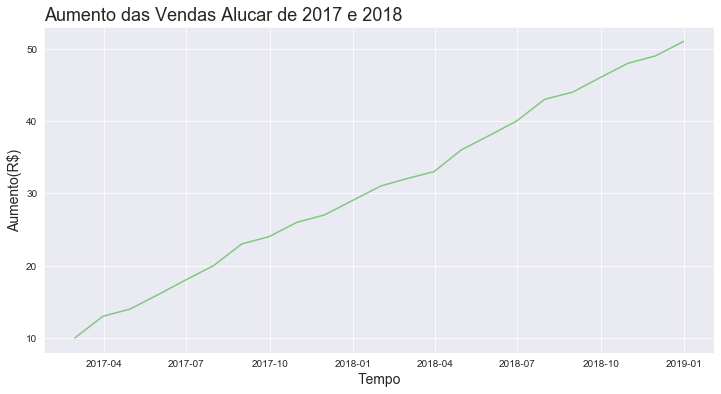

In [35]:
plotar('Aumento das Vendas Alucar de 2017 e 2018', 'Tempo', 'Aumento(R$)', 'mes', 'aumento', alucar)

In [38]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


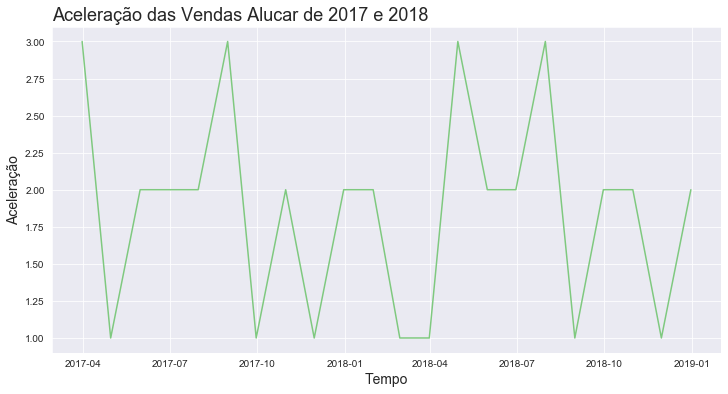

In [39]:
plotar('Aceleração das Vendas Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)